Step 1: Data Preparation and Importing Libraries



In [8]:
# Install TensorFlow if not installed and importing all the required libraries
!pip install tensorflow
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


In [9]:
# Loading IMDB dataset and limiting to the top 10,000 words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [10]:
# Data Description
# - train_data and train_labels represent the training set and labels (0 or 1).
# - test_data and test_labels represent the test set and labels.

print(train_data.shape)  # Viewing the structure of the training data
print(len(train_labels)) # Total labels in training data

(25000,)
25000


In [11]:
# Converting word indexes back into readable text to understand the data
word_to_index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in word_to_index.items()])
decoded_sample_review = " ".join([reverse_index.get(i - 3, "?") for i in train_data[0]])
print(decoded_sample_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

Step 2: Data Vectorization

We convert the integer sequences to vectors using a helper function, ensuring that the model can properly process the input.

In [12]:
#Using the Helper function to vectorize sequences into binary matrices
def vectorize_sequences(sequences, dimension=10000):
    vector_matrix = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        vector_matrix[i, sequence] = 1.0
    return vector_matrix

# Applying vectorization to the training and test data
x_train_vector = vectorize_sequences(train_data)
x_test_vector = vectorize_sequences(test_data)

# Converting the labels to float32 for better compatibility with the model
y_train_vector = np.asarray(train_labels).astype('float32')
y_test_vector = np.asarray(test_labels).astype('float32')

In [13]:
# Splitting Validation and Training Data
x_val_single = x_train_vector[:10000]
partial_x_train_single = x_train_vector[10000:]
y_val_single = y_train_vector[:10000]
partial_y_train_single = y_train_vector[10000:]


Step 3: Building the Model with Different Architectures

We explore different configurations by changing the number of layers and units.


In [14]:
# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

3.1 Model with single hidden layer

In [15]:
# Model with one hidden layer
single_layer_model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(10000,)),
    layers.Dense(1, activation='sigmoid')
])

single_layer_model.compile(optimizer='rmsprop',
                           loss='binary_crossentropy',
                           metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Fitting the model
history_single_layer = single_layer_model.fit(
    partial_x_train_single,
    partial_y_train_single,
    epochs=20,
    batch_size=512,
    validation_data=(x_val_single, y_val_single),
     callbacks=[early_stopping]
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.7095 - loss: 0.5971 - val_accuracy: 0.8547 - val_loss: 0.4211
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.8860 - loss: 0.3716 - val_accuracy: 0.8784 - val_loss: 0.3385
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9099 - loss: 0.2853 - val_accuracy: 0.8710 - val_loss: 0.3229
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9214 - loss: 0.2414 - val_accuracy: 0.8910 - val_loss: 0.2870
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9323 - loss: 0.2087 - val_accuracy: 0.8909 - val_loss: 0.2785
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9438 - loss: 0.1849 - val_accuracy: 0.8893 - val_loss: 0.2755
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9511 - loss: 0.1621 - val_accuracy: 0.8882 - val_loss: 0.2758
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9577 - loss: 0.1458 - val_accuracy: 0.8880 - 

3.2: Model with Three Hidden Layers


In [19]:
# Model with three hidden layers
three_layer_model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(10000,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

three_layer_model.compile(optimizer='rmsprop',
                          loss='binary_crossentropy',
                          metrics=['accuracy'])

# Training model with three hidden layers
history_three_layers = three_layer_model.fit(
    partial_x_train_single,
    partial_y_train_single,
    epochs=20,
    batch_size=512,
    validation_data=(x_val_single, y_val_single),
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.6468 - loss: 0.6340 - val_accuracy: 0.8108 - val_loss: 0.4680
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.8861 - loss: 0.3934 - val_accuracy: 0.8820 - val_loss: 0.3375
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9213 - loss: 0.2720 - val_accuracy: 0.8897 - val_loss: 0.2901


Step 4: Experiment with Different Units

4.1: Models with 32, 64, and 128 Units

Here we are training models with varying numbers of units in each layer to observe its impact on performance.

In [22]:
# Function to build models with a variable number of units
def build_model(units):
    model = keras.Sequential([
        layers.Dense(units, activation='relu', input_shape=(10000,)),
        layers.Dense(units, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# For 32 units
model_32_units = build_model(32)
history_32_units = model_32_units.fit(
    partial_x_train_single,
    partial_y_train_single,
    epochs=20,
    batch_size=512,
    validation_data=(x_val_single, y_val_single),
    callbacks=[early_stopping]
)

# Similarly,we will be building models for 64 and 128 units.


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.6595 - loss: 0.6065 - val_accuracy: 0.8467 - val_loss: 0.3966
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.8936 - loss: 0.3249 - val_accuracy: 0.8660 - val_loss: 0.3281
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9186 - loss: 0.2379 - val_accuracy: 0.8895 - val_loss: 0.2782


In [23]:
# For 64 units
model_64_units = build_model(64)
history_64_units = model_64_units.fit(
    partial_x_train_single,
    partial_y_train_single,
    epochs=20,
    batch_size=512,
    validation_data=(x_val_single, y_val_single),
    callbacks=[early_stopping]
)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.6769 - loss: 0.5926 - val_accuracy: 0.8448 - val_loss: 0.3789
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.8819 - loss: 0.3088 - val_accuracy: 0.8636 - val_loss: 0.3247
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.9196 - loss: 0.2191 - val_accuracy: 0.8821 - val_loss: 0.2890


In [25]:
# For 128 units
model_128_units = build_model(128)
history_128_units = model_128_units.fit(
    partial_x_train_single,
    partial_y_train_single,
    epochs=20,
    batch_size=512,
    validation_data=(x_val_single, y_val_single),
    callbacks=[early_stopping]
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.6531 - loss: 0.6018 - val_accuracy: 0.8154 - val_loss: 0.4194
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.8763 - loss: 0.3201 - val_accuracy: 0.8739 - val_loss: 0.3089
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.9275 - loss: 0.2140 - val_accuracy: 0.8399 - val_loss: 0.3949


Step 5: Use of Different Loss Functions (mse vs. binary_crossentropy)

In [27]:
# Model using MSE as a loss function
mse_model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(10000,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

mse_model.compile(optimizer='rmsprop',
                  loss='mse',
                  metrics=['accuracy'])

history_mse_model = mse_model.fit(
    partial_x_train_single,
    partial_y_train_single,
    epochs=20,
    batch_size=512,
    validation_data=(x_val_single, y_val_single),
    callbacks=[early_stopping]
)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.6664 - loss: 0.2148 - val_accuracy: 0.8553 - val_loss: 0.1315
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8851 - loss: 0.1119 - val_accuracy: 0.8758 - val_loss: 0.1024
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9108 - loss: 0.0821 - val_accuracy: 0.8877 - val_loss: 0.0900
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9363 - loss: 0.0624 - val_accuracy: 0.8859 - val_loss: 0.0875
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9363 - loss: 0.0563 - val_accuracy: 0.8783 - val_loss: 0.0907
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9534 - loss: 0.0464 - val_accuracy: 0.8847 - val_loss: 0.0861
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9551 - loss: 0.0421 - val_accuracy: 0.8818 - val_loss: 0.0849
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9658 - loss: 0.0354 - val_accuracy: 0.8827 - v

Step 6: Using tanh Activation Function

In [29]:
# Model using tanh activation function
tanh_model = keras.Sequential([
    layers.Dense(16, activation='tanh', input_shape=(10000,)),
    layers.Dense(16, activation='tanh'),
    layers.Dense(1, activation='sigmoid')
])

tanh_model.compile(optimizer='rmsprop',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

history_tanh_model = tanh_model.fit(
    partial_x_train_single,
    partial_y_train_single,
    epochs=20,
    batch_size=512,
    validation_data=(x_val_single, y_val_single),
    callbacks=[early_stopping]
)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.7039 - loss: 0.5695 - val_accuracy: 0.8725 - val_loss: 0.3615
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9029 - loss: 0.3046 - val_accuracy: 0.8823 - val_loss: 0.2958
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9282 - loss: 0.2152 - val_accuracy: 0.8882 - val_loss: 0.2739


Step 7: Techniques to Improve Model Performance

7.1: Regularization (L2)


In [30]:
from tensorflow.keras import regularizers

# Model with L2 Regularization
reg_model = keras.Sequential([
    layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(10000,)),
    layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation='sigmoid')
])

reg_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

history_reg_model = reg_model.fit(
    partial_x_train_single,
    partial_y_train_single,
    epochs=20,
    batch_size=512,
    validation_data=(x_val_single, y_val_single),
    callbacks=[early_stopping]
)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.6714 - loss: 0.6550 - val_accuracy: 0.8646 - val_loss: 0.4486
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8866 - loss: 0.3966 - val_accuracy: 0.8568 - val_loss: 0.4036
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9213 - loss: 0.3040 - val_accuracy: 0.8904 - val_loss: 0.3342


*7.2*: Dropout Regularization

In [32]:
# Model with Dropout
dropout_model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(10000,)),
    layers.Dropout(0.5),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

dropout_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

history_dropout_model = dropout_model.fit(
    partial_x_train_single,
    partial_y_train_single,
    epochs=20,
    batch_size=512,
    validation_data=(x_val_single, y_val_single),
    callbacks=[early_stopping]
)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.5601 - loss: 0.6779 - val_accuracy: 0.7832 - val_loss: 0.5785
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7237 - loss: 0.5783 - val_accuracy: 0.8639 - val_loss: 0.4698
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7919 - loss: 0.4840 - val_accuracy: 0.8744 - val_loss: 0.3787


Step 8: Plotting Results

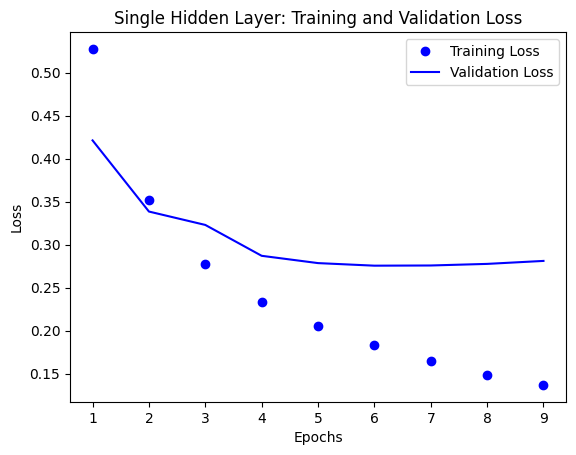

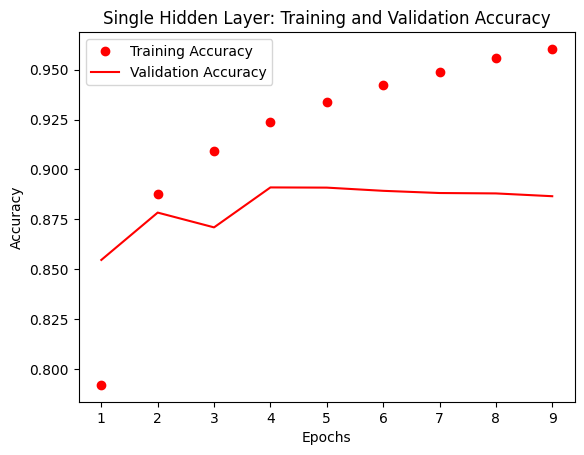

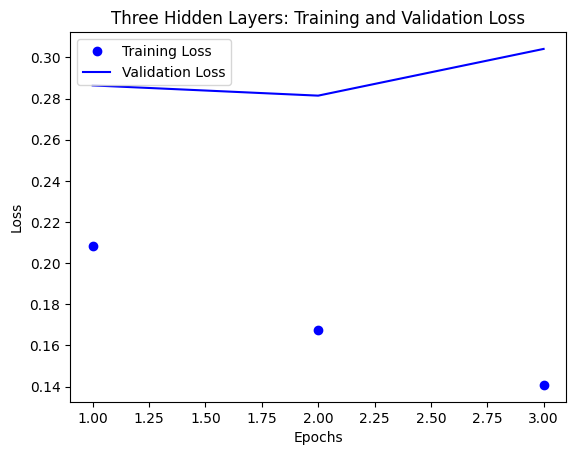

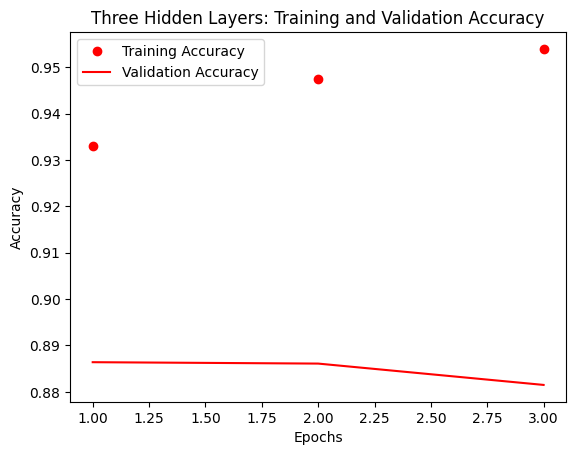

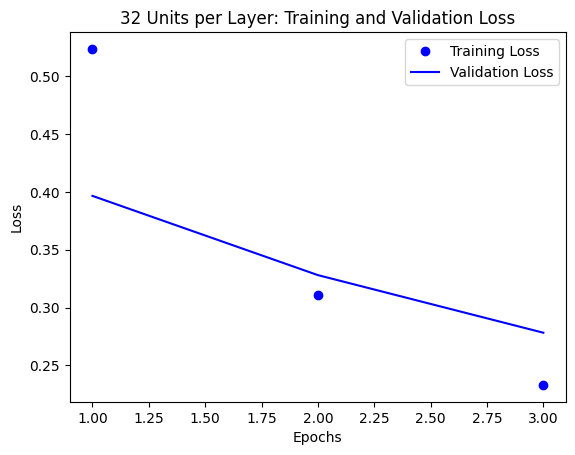

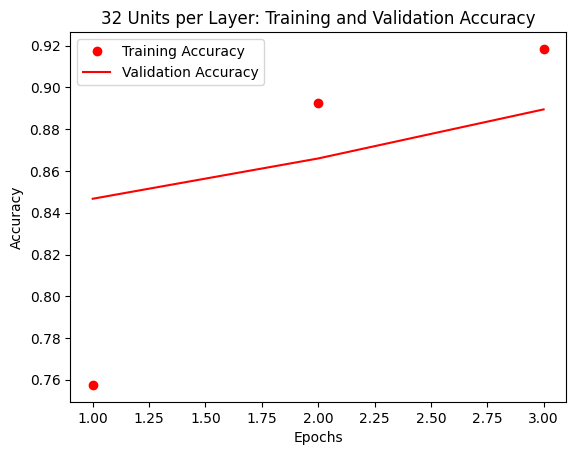

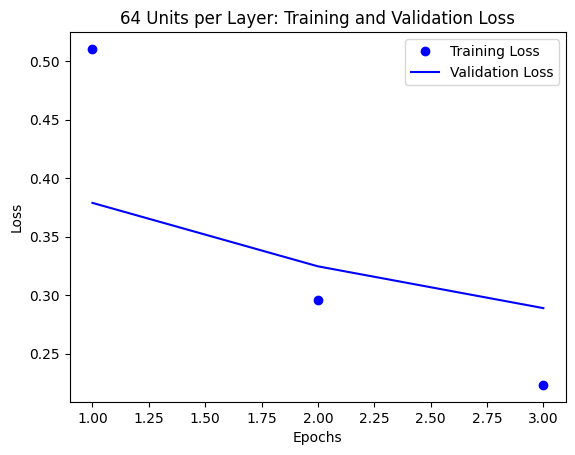

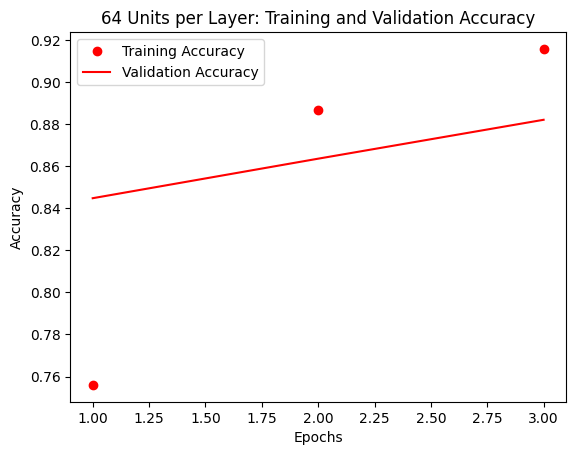

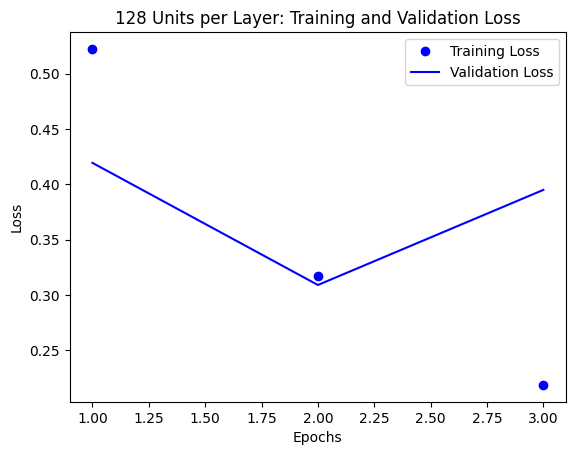

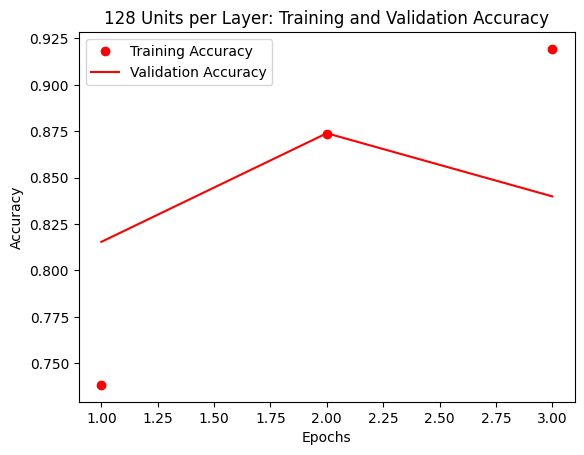

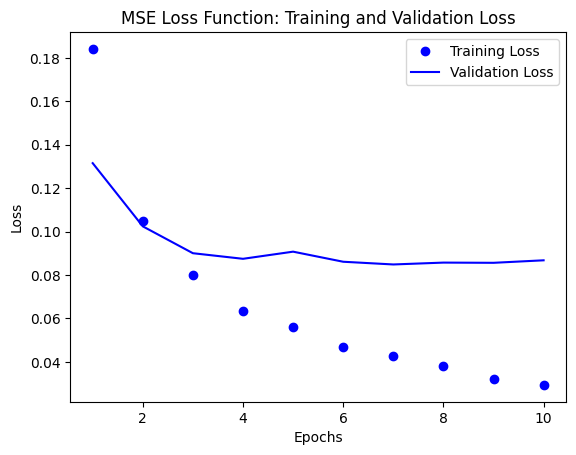

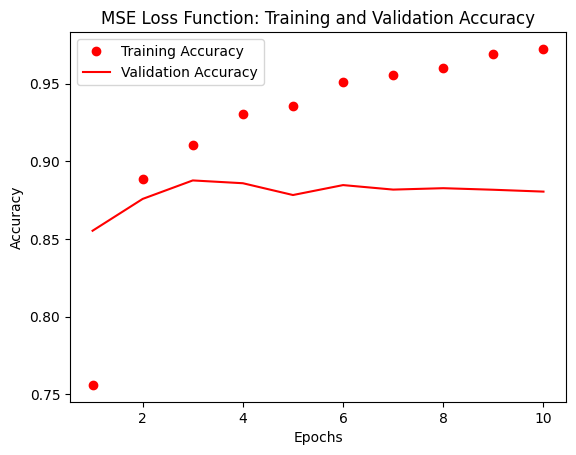

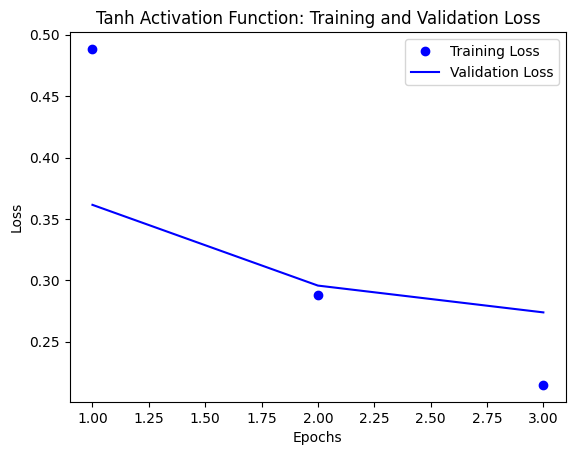

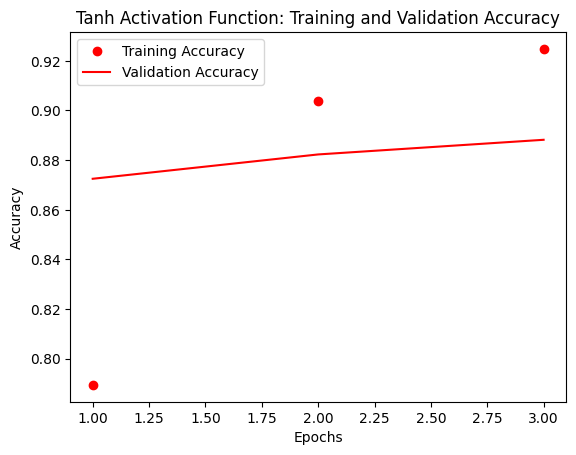

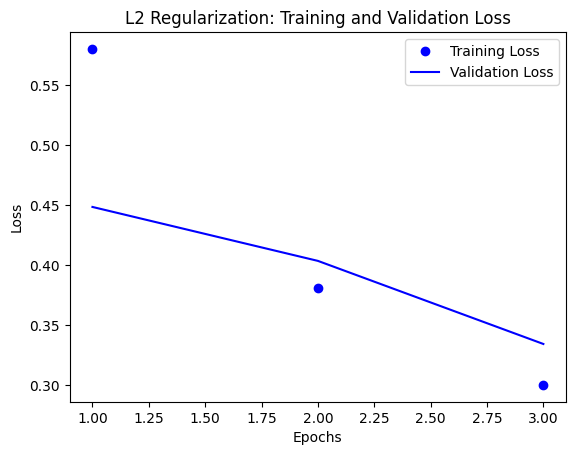

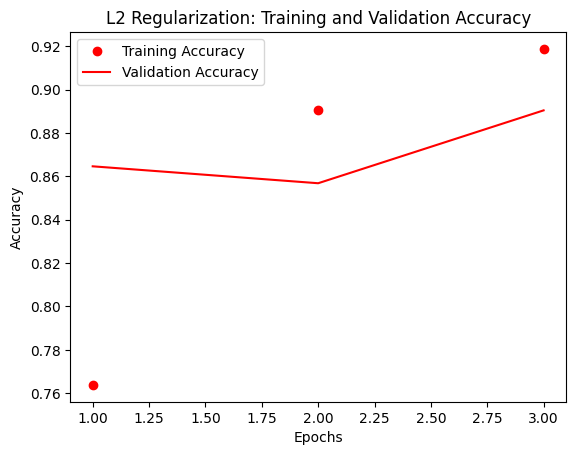

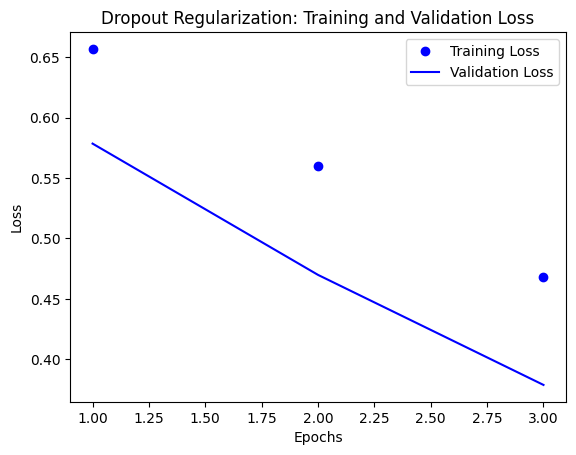

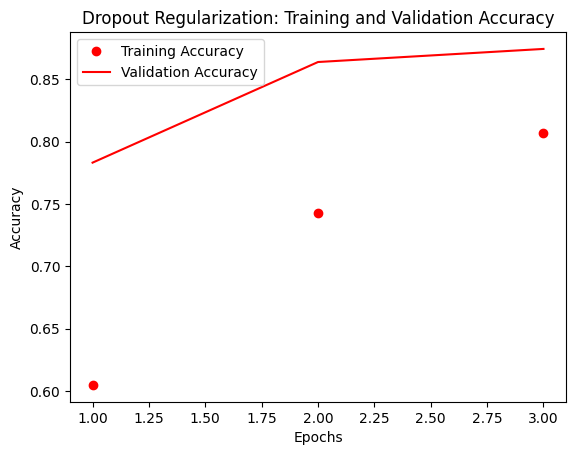

In [33]:
# Plotting function to avoid repetition
def plot_history(history, title):
    history_dict = history.history
    epochs = range(1, len(history_dict['loss']) + 1)

    # Plotting Training and Validation Loss
    plt.figure()
    plt.plot(epochs, history_dict['loss'], 'bo', label='Training Loss')
    plt.plot(epochs, history_dict['val_loss'], 'b', label='Validation Loss')
    plt.title(f'{title}: Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plotting Training and Validation Accuracy
    plt.figure()
    plt.plot(epochs, history_dict['accuracy'], 'ro', label='Training Accuracy')
    plt.plot(epochs, history_dict['val_accuracy'], 'r', label='Validation Accuracy')
    plt.title(f'{title}: Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Plot Histories for Each Model
plot_history(history_single_layer, "Single Hidden Layer")
plot_history(history_three_layers, "Three Hidden Layers")
plot_history(history_32_units, "32 Units per Layer")
plot_history(history_64_units, "64 Units per Layer")
plot_history(history_128_units, "128 Units per Layer")
plot_history(history_mse_model, "MSE Loss Function")
plot_history(history_tanh_model, "Tanh Activation Function")
plot_history(history_reg_model, "L2 Regularization")
plot_history(history_dropout_model, "Dropout Regularization")

In [34]:
# Step 10: Evaluating Models on Test Set
models = [
    single_layer_model, three_layer_model, model_32_units, model_64_units, model_128_units,
    mse_model, tanh_model, reg_model, dropout_model
]
model_names = [
    "Single Layer", "Three Layers", "32 Units", "64 Units", "128 Units",
    "MSE Loss", "Tanh Activation", "L2 Regularization", "Dropout"
]

for model, name in zip(models, model_names):
    test_loss, test_accuracy = model.evaluate(x_test_vector, y_test_vector)
    print(f"{name} Test Accuracy: {test_accuracy}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8785 - loss: 0.2976
Single Layer Test Accuracy: 0.8808799982070923
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8705 - loss: 0.3262
Three Layers Test Accuracy: 0.8722400069236755
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8821 - loss: 0.2908
32 Units Test Accuracy: 0.8831599950790405
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8747 - loss: 0.3023
64 Units Test Accuracy: 0.8773999810218811
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8310 - loss: 0.4139
128 Units Test Accuracy: 0.8342800140380859
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8721 - loss: 0.0941
MSE Loss Test Accuracy: 0.8750399947166443
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8823 - loss: 0.2899
Tanh Activation Test Accuracy: 0.8834800124168396
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8818 - loss: 0.3464
L2 Regularization Test Accuracy: 0.8829600214958191
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s